## IMDB 감정 분류하기
영화 리뷰 데이터. 긍정적인 리뷰와 부정적인 리뷰 분류하기\
긍정적인 리뷰는 1, 부정적인 리뷰는 0으로 나타냄.\
긍정적인 단어가 많은지, 부정적인 데이터가 많은지 구분하여 리뷰한 사람의 감정을 분류함.

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
# 데이터의 개수
print('trian data : {}'.format(len(X_train)))
print('test data : {}'.format(len(X_test)))

trian data : 25000
test data : 25000


In [4]:
# 각각의 숫자는 빈도가 높은 순으로 단어 하나하나에 대응됨
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
# 첫번째 데이터는 긍정적인 리뷰임.
print(y_train[0])

1


In [6]:
# 전처리하기 전 원래의 데이터 
index = imdb.get_word_index() 
index_to_word={}
for key, value in index.items():
    index_to_word[value+3] = key
decoded = " ".join( [index_to_word.get(i, "#") for i in X_train[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
# 문자를 벡터열로 변환함.
def vect(seq, dim=20000):
    X_vec=np.zeros((len(seq),dim)) #훈련 데이터의 개수 크기 만큼의 리스트를 만든다.
    for n, i in enumerate(seq):
        X_vec[n, i] = 1
    return X_vec

In [8]:
X_train=vect(X_train)
X_test=vect(X_test)

In [10]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
net = models.Sequential()
net.add(layers.Dense(256, activation='relu', input_shape=(20000,)))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [13]:
val = net.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
118/118 [==============================] - 9s 78ms/step - loss: 0.3653 - acc: 0.8427 - val_loss: 0.2910 - val_acc: 0.8821
Epoch 2/10
118/118 [==============================] - 9s 75ms/step - loss: 0.1654 - acc: 0.9394 - val_loss: 0.3589 - val_acc: 0.8697
Epoch 3/10
118/118 [==============================] - 9s 76ms/step - loss: 0.0853 - acc: 0.9717 - val_loss: 0.4231 - val_acc: 0.8663
Epoch 4/10
118/118 [==============================] - 9s 73ms/step - loss: 0.0323 - acc: 0.9904 - val_loss: 0.4793 - val_acc: 0.8717
Epoch 5/10
118/118 [==============================] - 9s 72ms/step - loss: 0.0099 - acc: 0.9981 - val_loss: 0.5794 - val_acc: 0.8668
Epoch 6/10
118/118 [==============================] - 9s 72ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.6678 - val_acc: 0.8718
Epoch 7/10
118/118 [==============================] - 8s 72ms/step - loss: 6.3534e-04 - acc: 1.0000 - val_loss: 0.7747 - val_acc: 0.8728
Epoch 8/10
118/118 [==============================] - 9s 73ms/ste

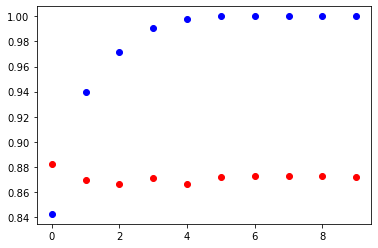

In [14]:
val_dict = val.history
acc = val_dict['acc']
val_acc = val_dict['val_acc']
x = np.arange(0,len(acc))

plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [15]:
test_loss, test_acc = net.evaluate(X_test,y_test)
print('score', test_acc)

782/782 [==============================] - 4s 5ms/step - loss: 1.0136 - acc: 0.8609
score 0.8609200119972229


문자를 벡터열로 변환하여 학습하면 0.86 정도로 예측할 수 있다.

## RNN 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 16)          400       
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 32)                1568      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 82,001
Trainable params: 82,001
Non-trainable params: 0
__________________________________________________

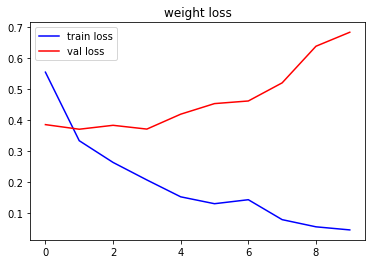

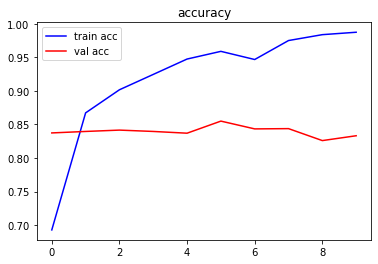

782/782 [==============================] - 11s 14ms/step - loss: 0.7084 - acc: 0.8296
acc 0.8295599818229675


In [10]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb

from keras.preprocessing import sequence
from keras.layers import SimpleRNN

words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=words)

# 단어집합의 크기를 words = 15000으로 설정함.
X_train = sequence.pad_sequences(X_train, maxlen = 300)
X_test = sequence.pad_sequences(X_test, maxlen = 300)

rnn = models.Sequential()
rnn.add(layers.Embedding(words, 8))
rnn.add(layers.SimpleRNN(16, return_sequences='True'))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam', loss='binary_crossentropy',metrics=['acc'])

print(rnn.summary())

rnn_fit = rnn.fit(X_train, y_train, epochs = 10, batch_size=64, validation_split=0.2)

loss = rnn_fit.history['loss']
val = rnn_fit.history['val_loss']
plt.plot(loss,'b',label='train loss')
plt.plot(val,'r',label='val loss')
plt.title('weight loss')
plt.legend()
plt.show()

loss = rnn_fit.history['acc']
val = rnn_fit.history['val_acc']
plt.plot(loss,'b', label='train acc')
plt.plot(val,'r', label='val acc')
plt.title('accuracy')
plt.legend()
plt.show()

test_loss, test_acc = rnn.evaluate(X_test,y_test)
print('acc', test_acc)


위의 그래프에서 보면 전체 데이터에 대하여 3회 학습을 하면 overfitting이 없이 충분히 학습되는 것으로 보여진다

In [9]:
rnn1 = models.Sequential()
rnn1.add(layers.Embedding(words, 8))
rnn1.add(layers.SimpleRNN(16, return_sequences='True'))
rnn1.add(layers.Dropout(0.2))
rnn1.add(layers.SimpleRNN(32))
rnn1.add(layers.Dropout(0.2))
rnn1.add(layers.Dense(1, activation='sigmoid'))
rnn1.compile(optimizer='nadam', loss='binary_crossentropy',metrics=['acc'])

rnn_fit = rnn1.fit(X_train, y_train, epochs = 3, batch_size=128, validation_split=0.2)
test_loss, test_acc = rnn1.evaluate(X_test,y_test)

print('acc', test_acc)

Epoch 1/3
157/157 [==============================] - 13s 81ms/step - loss: 0.6807 - acc: 0.5531 - val_loss: 0.6442 - val_acc: 0.6354
Epoch 2/3
157/157 [==============================] - 13s 80ms/step - loss: 0.5474 - acc: 0.7377 - val_loss: 0.4093 - val_acc: 0.8304
Epoch 3/3
782/782 [==============================] - 11s 14ms/step - loss: 0.3833 - acc: 0.8391
acc 0.8391199707984924


SImple RNN으로 학습하면 약 0.84의 정확도로 분류할 수 있다.

## LSTM

LSTM
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           120000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 16)          1600      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 127,905
Trainable params: 127,905
Non-trainable params: 0
___________________________________________

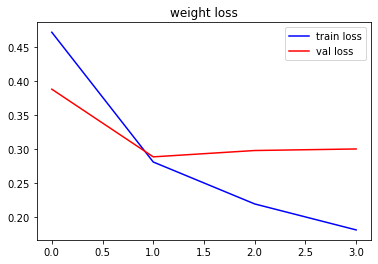

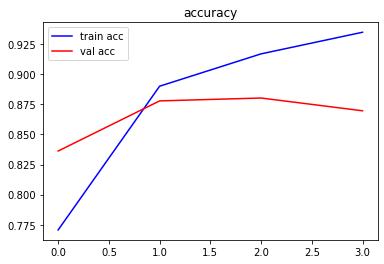

782/782 [==============================] - 23s 30ms/step - loss: 0.3154 - acc: 0.8652
acc 0.8652399778366089


In [7]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb

from keras.preprocessing import sequence
from keras.layers import LSTM
print('LSTM')

words = 15000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=words)

X_train = sequence.pad_sequences(X_train, maxlen = 300)
X_test = sequence.pad_sequences(X_test, maxlen = 300)

lstm = models.Sequential()
lstm.add(layers.Embedding(words, 8))
lstm.add(layers.LSTM(16, return_sequences='True'))
lstm.add(layers.LSTM(16, return_sequences='True'))
lstm.add(layers.Dropout(0.2))
lstm.add(layers.LSTM(32))
lstm.add(layers.Dropout(0.2))
lstm.add(layers.Dense(1, activation='sigmoid'))
lstm.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

print(lstm.summary())

lstm_fit = lstm.fit(X_train, y_train, epochs = 4, batch_size=64, validation_split=0.2)

loss = lstm_fit.history['loss']
val = lstm_fit.history['val_loss']
plt.plot(loss,'b',label='train loss')
plt.plot(val,'r',label='val loss')
plt.title('weight loss')
plt.legend()
plt.show()

loss = lstm_fit.history['acc']
val = lstm_fit.history['val_acc']
plt.plot(loss,'b', label='train acc')
plt.plot(val,'r', label='val acc')
plt.title('accuracy')
plt.legend()

plt.show()

test_loss, test_acc = lstm.evaluate(X_test,y_test)
print('acc', test_acc)

In [8]:
# 위의 그래프에서 보면 전체 데이터에 대하여 2번만 학습을 하면 overfitting 없이 충분히 학습되는 것으로 보여진다.
lstm1 = models.Sequential()
lstm1.add(layers.Embedding(words, 8))
lstm1.add(layers.LSTM(16, return_sequences='True'))
lstm1.add(layers.Dropout(0.2))
lstm1.add(layers.LSTM(32))
lstm1.add(layers.Dropout(0.2))
lstm1.add(layers.Dense(1, activation='sigmoid'))
lstm1.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

lstm_fit = lstm1.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)
test_loss, test_acc = lstm1.evaluate(X_test,y_test)

print('acc', test_acc)

Epoch 1/2
313/313 [==============================] - 45s 143ms/step - loss: 0.4920 - acc: 0.7416 - val_loss: 0.3225 - val_acc: 0.8660
Epoch 2/2
782/782 [==============================] - 23s 29ms/step - loss: 0.3075 - acc: 0.8714
acc 0.8713600039482117


LSTM으로 학습을 하면 0.87 정도의 정확도로 리뷰를 분류할 수 있다.